# Project 01

**Submitted by: Diego Sol**

CSCE 636-600: Deep Learning

Professor: Dr. Anxiao Jiang

Mount Google Drive to this notebook to easily access training data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Download training images and labels

In [2]:
import pickle
all_images = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/CSCE_636_Project_1/636_project1_train_images', 'rb'))
all_labels = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/CSCE_636_Project_1/636_project1_train_labels', 'rb'))

Split the data into training and validation sets

In [3]:
data_split = 50000

train_images = all_images[:data_split,:,:]
train_labels = all_labels[:data_split,]

test_images = all_images[data_split:,:,:]
test_labels = all_labels[data_split:,]

In [4]:
train_images[1].shape

TensorShape([28, 28])

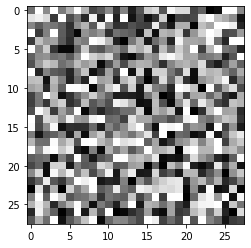

In [19]:
import numpy
import matplotlib.pyplot as plt

# all_images.shape
digit = all_images[3]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

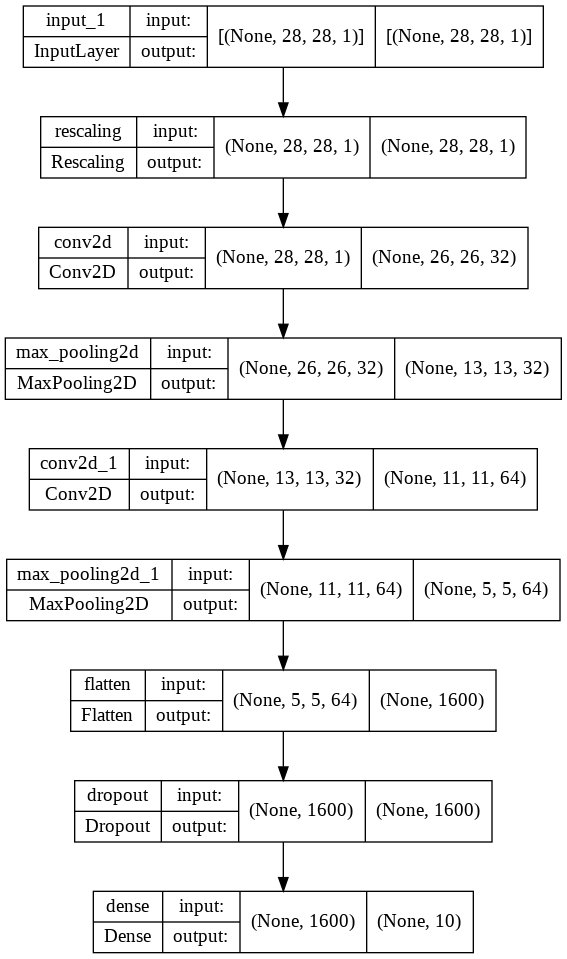

In [6]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(28, 28, 1))
x = layers.Rescaling(1./255)(inputs)

# convolutional layers
x = layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)

x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(10, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

keras.utils.plot_model(model, show_shapes=True, to_file="simple_convnet.png")

In [7]:
callbacks_list = [
                  keras.callbacks.ModelCheckpoint(
                      filepath="noisy_MNIST_convnet.keras",
                      monitor="val_loss",
                      save_best_only=True
                  )
]

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(train_images, train_labels,
          epochs=50,
          validation_split=0.4,
          batch_size=32,
          callbacks=callbacks_list)

Epoch 1/50
938/938 [==============================] - 14s 4ms/step - loss: 2.1892 - accuracy: 0.1933 - val_loss: 1.9861 - val_accuracy: 0.3043
Epoch 2/50
938/938 [==============================] - 4s 4ms/step - loss: 1.9385 - accuracy: 0.3192 - val_loss: 1.8357 - val_accuracy: 0.3661
Epoch 3/50
938/938 [==============================] - 4s 4ms/step - loss: 1.7541 - accuracy: 0.3928 - val_loss: 1.5904 - val_accuracy: 0.4572
Epoch 4/50
938/938 [==============================] - 4s 4ms/step - loss: 1.6115 - accuracy: 0.4460 - val_loss: 1.4969 - val_accuracy: 0.4927
Epoch 5/50
938/938 [==============================] - 4s 4ms/step - loss: 1.5233 - accuracy: 0.4784 - val_loss: 1.3914 - val_accuracy: 0.5274
Epoch 6/50
938/938 [==============================] - 4s 4ms/step - loss: 1.4677 - accuracy: 0.4983 - val_loss: 1.3679 - val_accuracy: 0.5308
Epoch 7/50
938/938 [==============================] - 4s 4ms/step - loss: 1.4241 - accuracy: 0.5143 - val_loss: 1.4460 - val_accuracy: 0.5005
Epoch

In [8]:
# history data
history_dict = history.history

# training metric history
train_loss_values = history_dict["loss"]
train_acc_values = history_dict["accuracy"]

# validation metric history
val_loss_values = history_dict["val_loss"]
val_acc_values = history_dict["val_accuracy"]

# epochs
epochs = range(1, len(train_loss_values) + 1)

In [9]:
# history data
history_dict = history.history

# training metric history
train_loss_values = history_dict["loss"]
train_acc_values = history_dict["accuracy"]

# validation metric history
val_loss_values = history_dict["val_loss"]
val_acc_values = history_dict["val_accuracy"]

# epochs
epochs = range(1, len(train_loss_values) + 1)

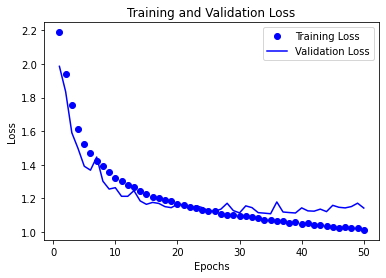

In [10]:
# create figure for training data
fig3, ax3 = plt.subplots()

# plot
ax3.plot(epochs, train_loss_values, "bo", label="Training Loss")
ax3.plot(epochs, val_loss_values, "b", label="Validation Loss")
ax3.set_title("Training and Validation Loss")
ax3.set_xlabel("Epochs")
ax3.set_ylabel("Loss")
ax3.legend()
plt.show()

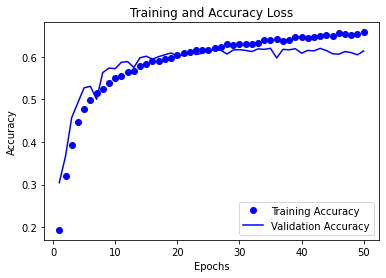

In [11]:
# create figure for training data
fig4, ax4 = plt.subplots()

# plot
ax4.plot(epochs, train_acc_values, "bo", label="Training Accuracy")
ax4.plot(epochs, val_acc_values, "b", label="Validation Accuracy")
ax4.set_title("Training and Accuracy Loss")
ax4.set_xlabel("Epochs")
ax4.set_ylabel("Accuracy")
ax4.legend()
plt.show()

In [12]:
# print final results
results = model.evaluate(test_images, test_labels)
print(f'Network loss:     {results[0]}')
print(f'Network accuracy: {results[1]}')

313/313 [==============================] - 1s 2ms/step - loss: 1.1488 - accuracy: 0.6064
Network loss:     1.1488090753555298
Network accuracy: 0.6064000129699707


In [13]:
predictions = model.predict(test_images)

In [25]:
import tensorflow as tf

idx = 9

print('Prediction: %i' % predictions[idx].argmax())
print(predictions[idx][predictions[idx].argmax()]*100)

tf.print('Truth: %i' % test_labels[idx])

Prediction: 9
44.959813356399536
Truth: 9
